<a href="https://colab.research.google.com/github/akashgaurav1997/Superstore-Marketing-Results/blob/main/Copy_of_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
#Importing necessary library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mounting google drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing dataset from google drive:
df = pd.read_excel("/content/drive/MyDrive/weekyly_dayfolder/Applied statistics excel format data.xlsx")

In [ ]:
#Reading first five rows and columns of dataset:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
#Total non-null count and column datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#shape of the dataset:
df.shape

(2240, 22)

In [ ]:
#Data description:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000



*This table give a brief description of all numerical columns, we can get a over view about count, mean, standard deviation, min, max of each numerical column.*


In [ ]:
#Finding column with null values:
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

*We can observe that Income column had 24 null values.

In [ ]:
#Dropping duplicate values from the dataset:
df.drop_duplicates(inplace = True)

In [ ]:
#Shape of the dataset:
df.shape

(2240, 22)

*We can observe that after dropping duplicate, shape of dataset didn't change.*

In [ ]:
#Filling null value with mean.
df['Income'] = df['Income'].fillna(df['Income'].mean())

*We have imputed mean of income in place of null values.*

In [ ]:
#shape of dataset after inputation:
df.shape


(2240, 22)

In [ ]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [ ]:
#data set after imputation:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
#data printing:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
#checking central tendency:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


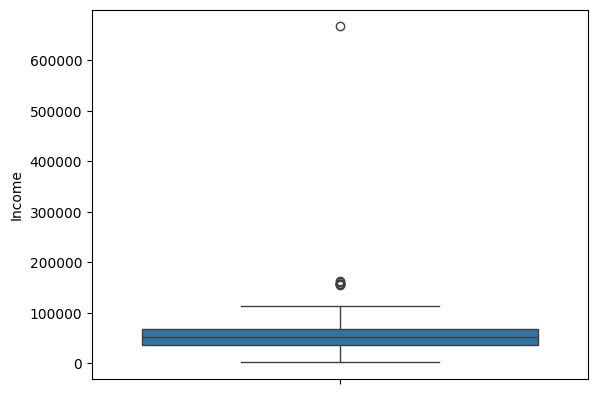

In [ ]:
#Finding outlier in Income:
sns.boxplot(df['Income'])
plt.show()

*We can observe that there is an outlier in the income column, which exceeds 600,000. We need to address this outlier.*

In [ ]:
#Handling outlier in Income:
iqr_Income = 68275 - 35538
df.loc[df['Income'] > (1.5 * iqr_Income) + 68275 , 'Income'] = df['Income'].median()

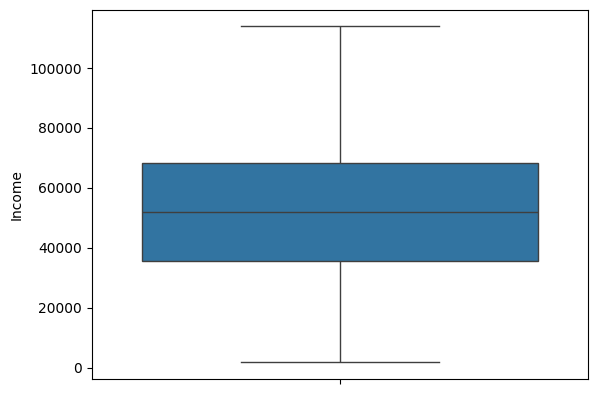

In [ ]:
#Printing boxplot after handling outlier:
sns.boxplot(df['Income'])
plt.show()

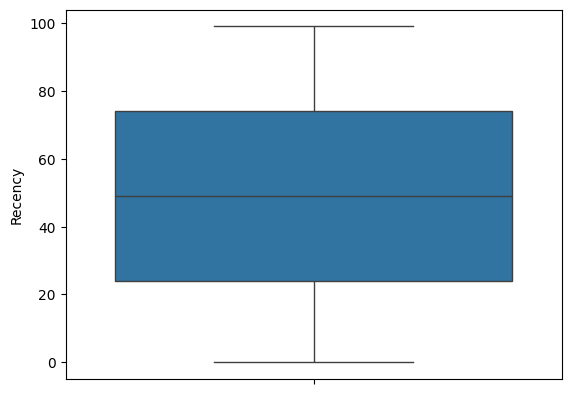

In [ ]:
#Finding outlier in recency:
sns.boxplot(df['Recency'])
plt.show()

*We can observe that there is no outlier in Recency column.*

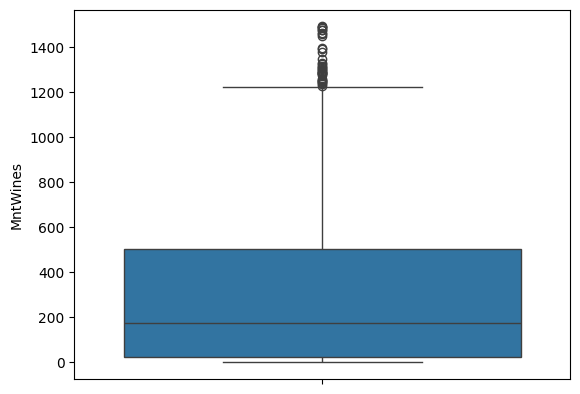

In [ ]:
#Finding outlier in MntWines:
sns.boxplot(df['MntWines'])
plt.show()

*We can observe that there is some outlier in the MntWines.*

In [ ]:
#Handling outlier in MntWines:
iqr_MntWines = 504 - 23
df.loc[df['MntWines'] > (1.5 * iqr_MntWines) + 33 , 'MntWines'] = df['MntWines'].median()

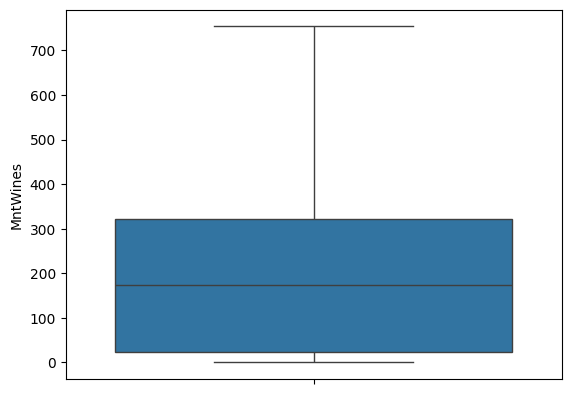

In [ ]:
#Ploting boxplot after handling outlier:
sns.boxplot(df['MntWines'])
plt.show()

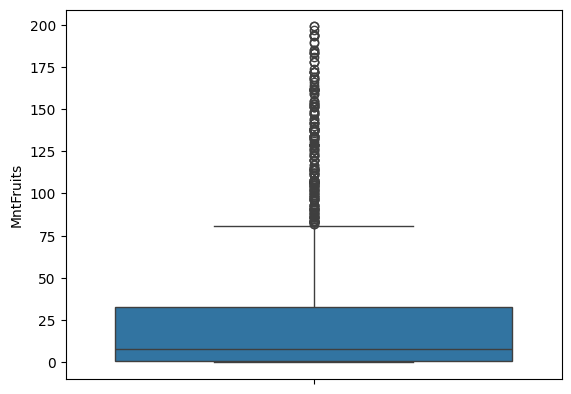

In [ ]:
#Finding outlier in MntFruits:
sns.boxplot(df['MntFruits'])
plt.show()

*We can observe there are some outlier in MntFruits column, we can handle it by imputing median value.*

In [ ]:
#Handling outlier in MntFruits:
iqr_MntFruits = 33 - 1
df.loc[df['MntFruits'] > (1.5 * iqr_MntFruits) + 33 , 'MntFruits'] = df['MntFruits'].median()

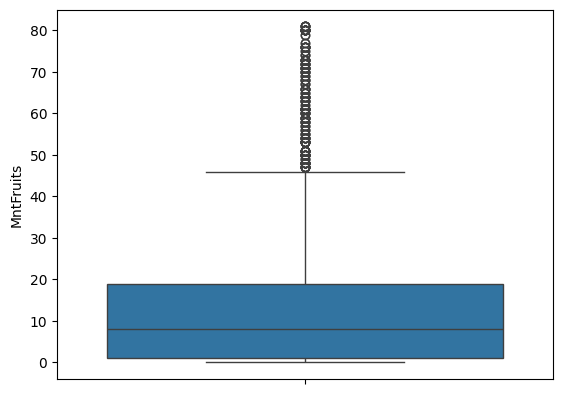

In [ ]:
#Ploting boxplot after handling outlier:
sns.boxplot(df['MntFruits'])
plt.show()

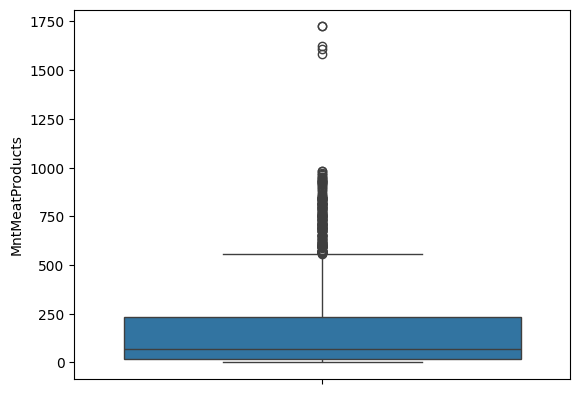

In [ ]:
#Finding outlier in MntMeatProducts:
sns.boxplot(df['MntMeatProducts'])
plt.show()

*We can observe that there is some outlier in MntMeatProducts column, we can handle it with imputing median value.*

In [ ]:
#Handling outlier in MntMeatProducts:
iqr_MntMeatProducts = 232 - 16
df.loc[df['MntMeatProducts'] > (1.5 * iqr_MntMeatProducts) + 232 , 'MntMeatProducts'] = df['MntMeatProducts'].median()

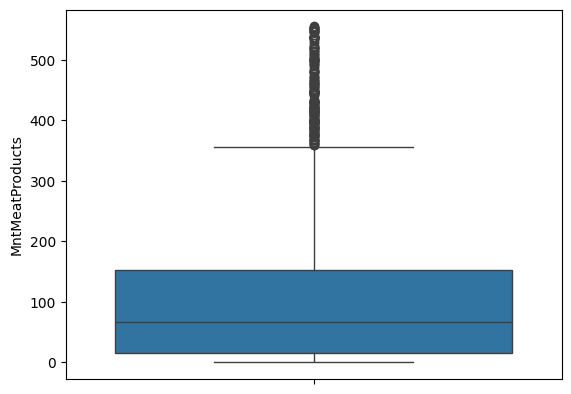

In [ ]:
#Ploting boxplot after handling outlier in MntMeatProducts:
sns.boxplot(df['MntMeatProducts'])
plt.show()

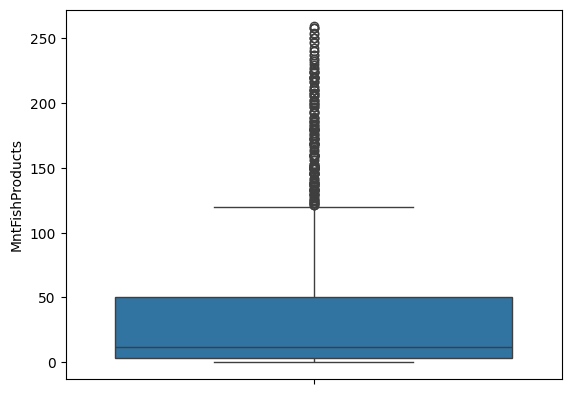

In [ ]:
#Finding outlier in MntFishProducts:
sns.boxplot(df['MntFishProducts'])
plt.show()

*We can observe that there is some outlier in MntFishProducts column.*

In [ ]:
#Handling outlier in MntFishProducts:
iqr_MntFishProducts = 50 - 3
df.loc[df['MntFishProducts'] > (1.5 * iqr_MntFishProducts) + 50 , 'MntFishProducts'] = df['MntFishProducts'].median()

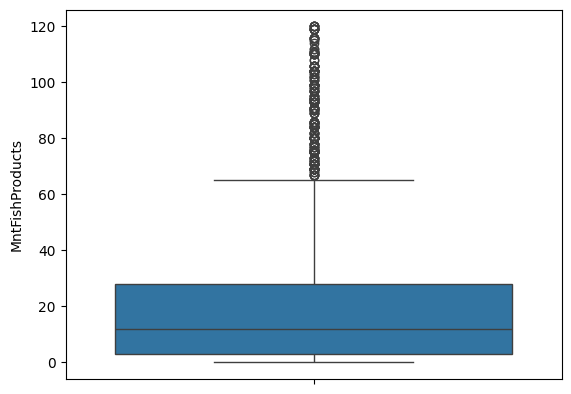

In [ ]:
#Ploting boxplot after handling outlier in MntFishProducts:
sns.boxplot(df['MntFishProducts'])
plt.show()

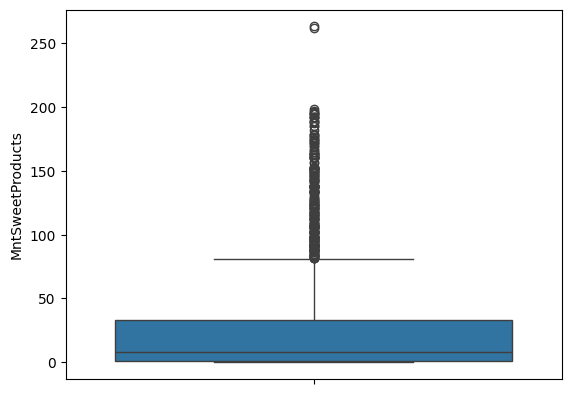

In [ ]:
#Finding outlier in MntSweetProducts:
sns.boxplot(df['MntSweetProducts'])
plt.show()

*We can observe that there are some outlier in the MntSweetProducts, we can handle it with imputing median, we will handle upto 1.5 times the iqr + mean.*

In [ ]:
#Handling outlier in MntSweetProducts:
#q3 + threshold * iqr
iqr = 33 - 1
df.loc[df['MntSweetProducts'] > (1.5 * iqr) + 33 , 'MntSweetProducts'] = df['MntSweetProducts'].median()

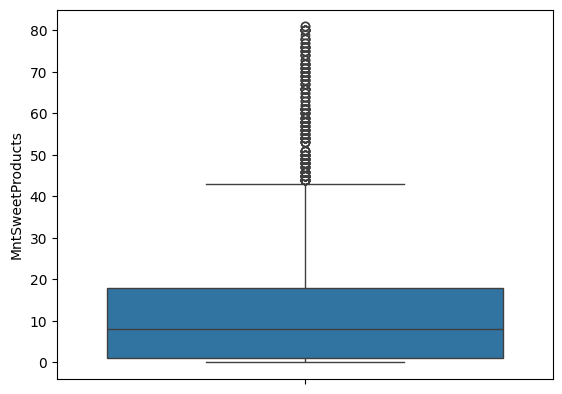

In [ ]:
#Ploting boxplot after handling outlier in MntFishProducts:

sns.boxplot(df['MntSweetProducts'])
plt.show()

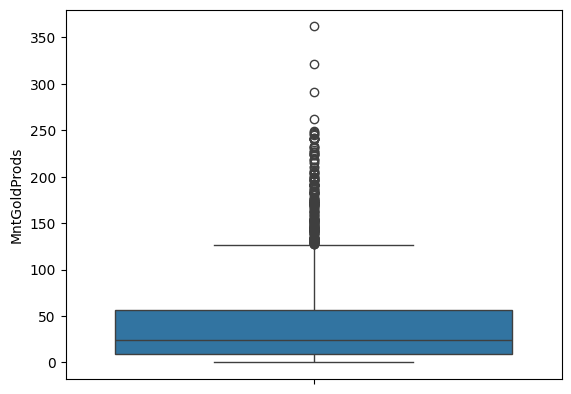

In [ ]:
#Finding outlier in MntGoldProds:
sns.boxplot(df['MntGoldProds'])
plt.show()

*We can observe some outlier in MntGoldProds, we can handle it with median imputation for data above the 1.5 time the iqr + q3.

In [ ]:
#Handling outlier in MntGoldProds:
#q3 + threshold * iqr
iqr = 56 - 9
df.loc[df['MntGoldProds'] > (1.5 * iqr) + 56 , 'MntGoldProds'] = df['MntGoldProds'].median()

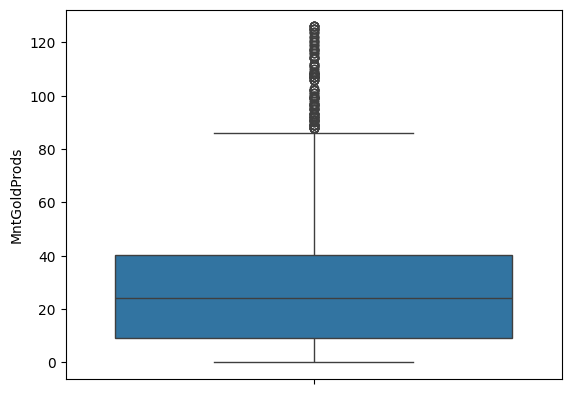

In [ ]:
#Ploting boxplot after handling outlier in MntGoldProds:
sns.boxplot(df['MntGoldProds'])
plt.show()

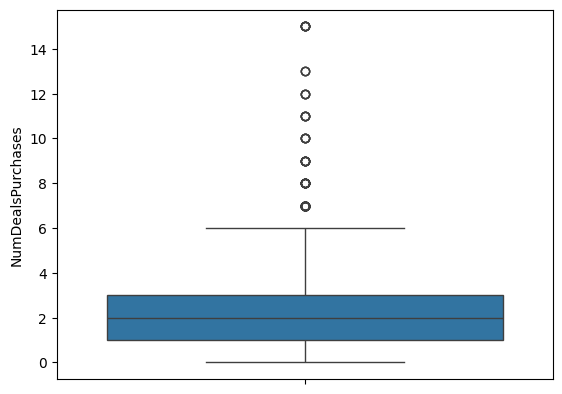

In [ ]:
#Finding outlier in NumDealsPurchases:
sns.boxplot(df['NumDealsPurchases'])
plt.show()

*We can observe few outlier, we will handle  it with median imputation.*

In [ ]:
#Handling outlier in NumDealsPurchases:
#q3 + threshold * iqr
iqr = 3 - 1
df.loc[df['NumDealsPurchases'] > (1.5 * iqr) + 3 , 'NumDealsPurchases'] = df['NumDealsPurchases'].median()

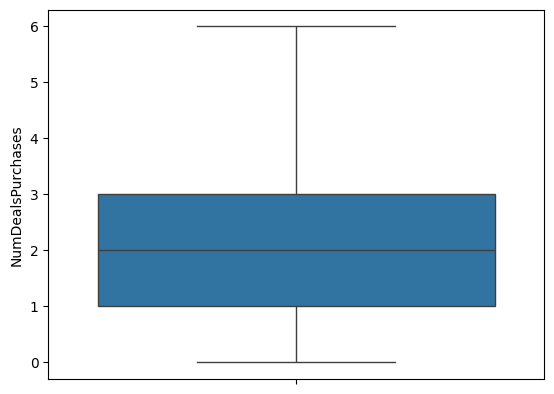

In [ ]:
#Ploting boxplot after handling outlier in NumDealsPurchases:
sns.boxplot(df['NumDealsPurchases'])
plt.show()

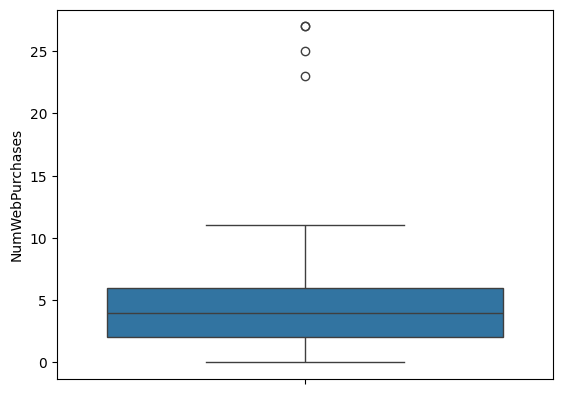

In [ ]:
#Finding outlier in NumWebPurchases:
sns.boxplot(df['NumWebPurchases'])
plt.show()

*We can observe three outliers, we can drop it but we will try to handle it with median imputation.*

In [ ]:
#Handling outlier in NumWebPurchases:
#q3 + threshold * iqr
iqr = 6 - 2
df.loc[df['NumWebPurchases'] > (1.5 * iqr) + 6 , 'NumWebPurchases'] = df['NumWebPurchases'].median()

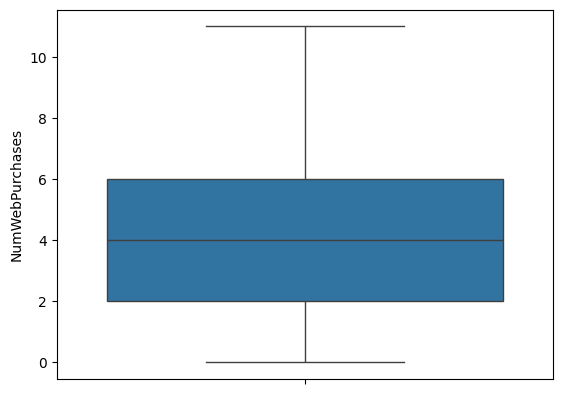

In [ ]:
#Ploting boxplot after handling outlier in NumWebPurchases:
sns.boxplot(df['NumWebPurchases'])
plt.show()

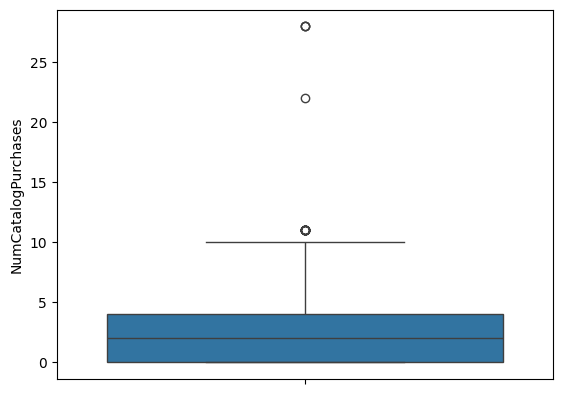

In [ ]:
#Finding outlier in NumCatalogPurchases:
sns.boxplot(df['NumCatalogPurchases'])
plt.show()

*We can observe three outliers, we will handle it with median imputation.*

In [ ]:
#Handling outlier in NumCatalogPurchases:
#q3 + threshold * iqr
iqr = 4 - 0
df.loc[df['NumCatalogPurchases'] > (1.5 * iqr) + 4 , 'NumCatalogPurchases'] = df['NumCatalogPurchases'].median()

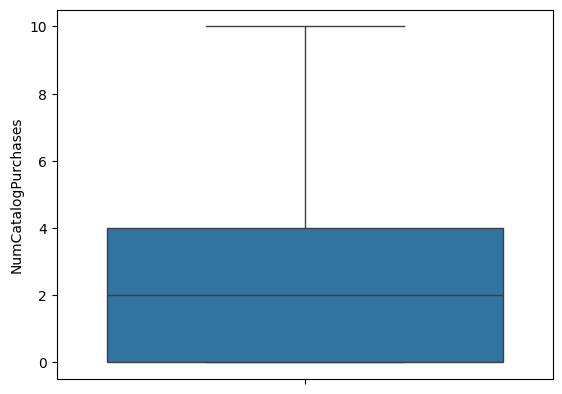

In [ ]:
#Ploting boxplot after handling outlier in NumCatalogPurchases:
sns.boxplot(df['NumCatalogPurchases'])
plt.show()

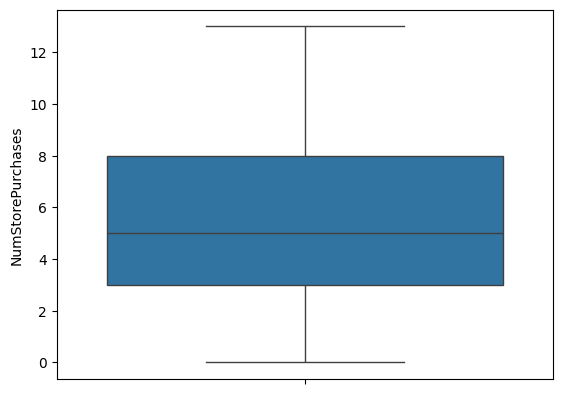

In [ ]:
#Finding outlier in NumStorePurchases:
sns.boxplot(df['NumStorePurchases'])
plt.show()

*We can observe there is no outlier in this column.*

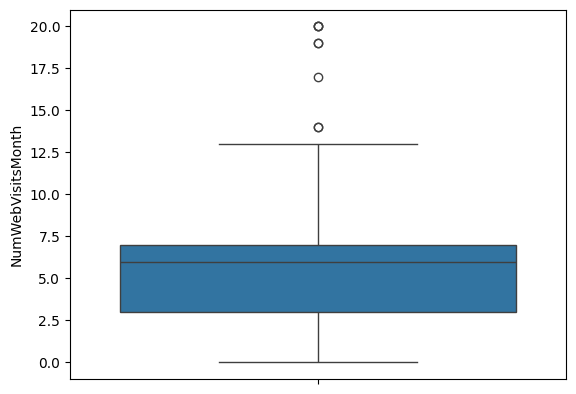

In [ ]:
#Finding outlier in NumWebVisitsMonth:
sns.boxplot(df['NumWebVisitsMonth'])
plt.show()

*We can observe few outlier in this column, we can handle it with median imputation.*

In [ ]:
#Handling outlier in NumWebVisitsMonth:
#q3 + threshold * iqr
iqr = 7 - 3
df.loc[df['NumWebVisitsMonth'] > (1.5 * iqr) + 7 , 'NumWebVisitsMonth'] = df['NumWebVisitsMonth'].median()

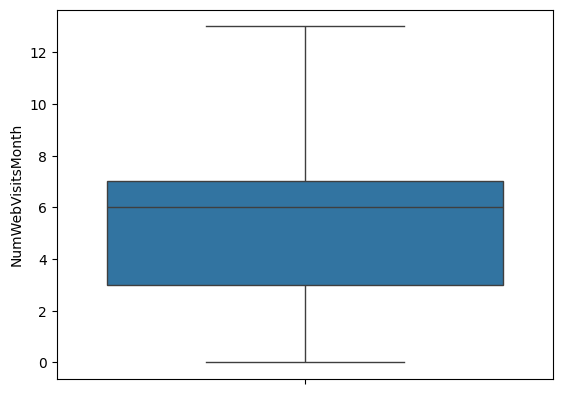

In [ ]:
#Ploting boxplot after handling outlier in NumWebVisitsMonth:
sns.boxplot(df['NumWebVisitsMonth'])
plt.show()

In [ ]:
#Finding variance of Income:
Income_var = df['Income'].var()

In [ ]:
#printing income_var:
Income_var

422916059.3280528

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189.0,...,111,8,24,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464.0,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134.0,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10.0,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6.0,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,51640.597782,0.444196,0.506250,49.109375,202.104911,14.281250,112.670089,21.314286,13.855804,30.015625,2.062054,4.046429,2.541964,5.790179,5.274107,0.149107,0.009375
std,3246.662198,11.984069,20564.923032,0.538398,0.544538,28.962453,204.597053,18.719299,135.044047,27.831455,18.117876,28.751608,1.340004,2.625941,2.630095,3.250958,2.303046,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51729.250000,0.000000,0.000000,49.000000,173.250000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68098.250000,1.000000,1.000000,74.000000,322.000000,19.000000,153.000000,28.000000,18.000000,40.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,754.000000,81.000000,555.000000,120.000000,81.000000,126.000000,6.000000,11.000000,10.000000,13.000000,13.000000,1.000000,1.000000


In [ ]:
import numpy as np
import pandas as pd

# income data variable:
income_data = df['Income']

# Calculate mean and standard deviation of income data
mean_income = income_data.mean()
std_dev_income = income_data.std()

# Generate random samples from a normal distribution
num_samples = len(income_data)
generated_income_data = np.random.normal(loc=mean_income, scale=std_dev_income, size=num_samples)

# Print the generated income data
print(generated_income_data)


[80393.94583767 50993.05196775 28188.23002214 ... 80656.1625484
 88980.21315442 72803.04998684]


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189.0,...,111,8,24,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464.0,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134.0,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10.0,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6.0,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Relationship between Income and wine purchase with marital status:
sns.scatterplot(data=df, x='Income', y='MntWines', hue = 'Marital_Status')
plt.show()


*Observation:

*   Customer with less than 40000 income spending less on wines.
*   Customer with more than 40000 income spending good amount on wines.
*   There negligible impact of marital status on wine purchase.




In [ ]:
# Relationship between Income and wine purchase with education:
sns.scatterplot(data=df, x='Income', y='MntWines', hue = 'Education')
plt.show()

*We can observe that there is very less impact of education on wine purchase of customers.*

In [ ]:
# Relationship between Income and wine purchase with year birth:
sns.scatterplot(data=df, x='Income', y='MntWines', hue = 'Year_Birth')
plt.show()

*We can observe that there is no impact of year birth on wine purchase.*

In [ ]:
# Relationship between Income and MntFishProducts with marital status:
sns.scatterplot(data=df, x='Income', y='MntFishProducts', hue = 'Marital_Status')
plt.show()

In [ ]:
# Relationship between Income and MntFishProducts purchase with education:
sns.scatterplot(data=df, x='Income', y='MntFishProducts', hue = 'Education')
plt.show()

In [ ]:
# Relationship between Income and MntFishProducts purchase with year birth:
sns.scatterplot(data=df, x='Income', y='MntFishProducts', hue = 'Year_Birth')
plt.show()

*Observation:*

*   Majority of the customers are purchasing less than 40 MntFishProducts.

*   Some of the Customers with income more than 40000 purchasing more 40 units.

*   Majority of the Customers are single, married, together or divorced.
*   Majority of the Customers are Graduate, Phd or Masters.


*   Majority of the Customers are between 1940 and 1980.


*   We can say that income has major impact on purchase of MntFishProducts, marital status and birth year have very less impact on purchase of MntFishProducts.



In [ ]:
# Relationship between Income and	MntSweetProducts with marital status:
sns.scatterplot(data=df, x ='Income', y ='MntSweetProducts', hue = 'Marital_Status')
plt.show()

In [ ]:
# Relationship between Income and MntSweetProducts purchase with education:
sns.scatterplot(data=df, x ='Income', y ='MntSweetProducts', hue = 'Education')
plt.show()

In [ ]:
# Relationship between Income and MntSweetProducts purchase with year birth:
sns.scatterplot(data=df, x ='Income', y ='MntSweetProducts', hue = 'Year_Birth')
plt.show()

*Observation:*

*   Majority of the customers are purchasing less than 20 MntSweetProducts.

*   Some of the Customers with income more than 40000 purchasing more 20 units.

*   Majority of the Customers are single, married, together or divorced.
*   Majority of the Customers are Graduate, Phd or Masters.


*   Majority of the Customers are between 1940 and 1980.

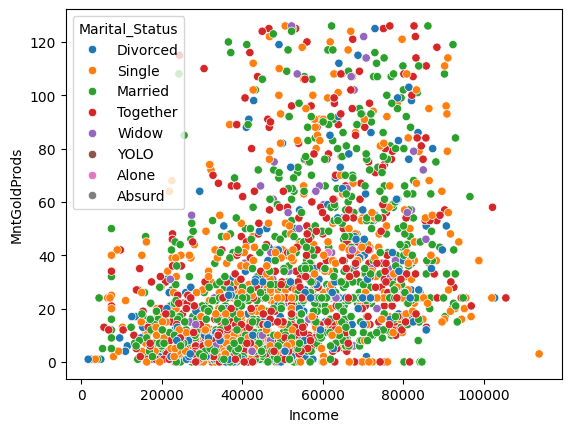

In [ ]:
# Relationship between Income and MntGoldProds with marital status:
sns.scatterplot(data=df, x ='Income', y ='MntGoldProds', hue = 'Marital_Status')
plt.show()

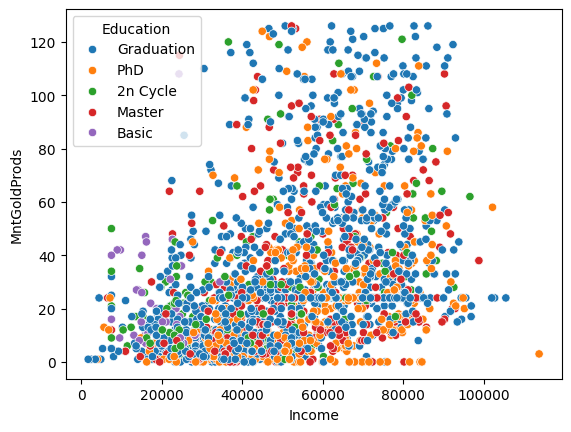

In [ ]:
# Relationship between Income and MntGoldProds purchase with education:
sns.scatterplot(data=df, x ='Income', y ='MntGoldProds', hue = 'Education')
plt.show()


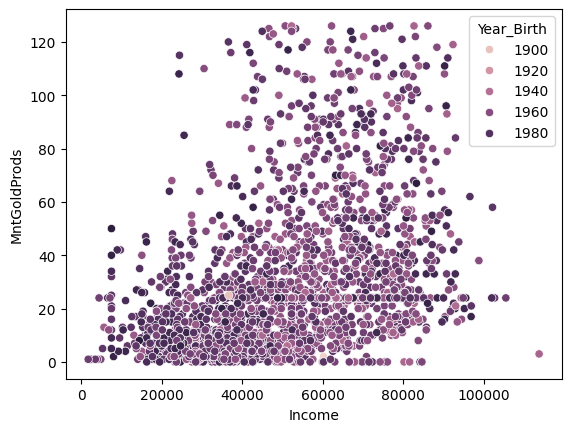

In [ ]:
# Relationship between Income and MntGoldProds purchase with year birth:
sns.scatterplot(data=df, x ='Income', y ='MntGoldProds', hue = 'Year_Birth')
plt.show()

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

*Conclusions.*

* Income is a clear indicator that shows customers' purchasing behavior.

* Single, married, cohabiting, and divorced customers make significant contributions.

* Graduate, PhD, and master's degree-qualified customers make significant contributions.

* Customers born between 1940 and 1980 make significant contributions.



*Recommendations.*

* The company should give more attention to customers whose income is between 40000 and 80000. Additionally, the company should encourage customers whose income falls between 20000 and 40000 by providing more suitable products within their budget. Furthermore, the company should strive to provide the best possible services to its regular customers.

* The company should give more preference to the educated segment of the population, but it should also not ignore others.

* The company can plan offers tailored to married, single, divorced, and cohabiting customers accordingly, as they constitute our most valuable customer categories."

* The company should focus on customers born between 1940 and 1980.



**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍